In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import json
from pathlib import Path

In [2]:
GRAPHLOC = Path('graphs/fl') 

In [3]:
pi_fm = pd.read_csv('data/frozenlake_policy_iteration.csv')
vi_fm = pd.read_csv('data/frozenlake_value_iteration_gamma6.csv')
ql_fm = pd.read_csv('data/frozenlake_qlearner.csv')



In [4]:
vi_fm.head()

,Unnamed: 0,map_size,time,iters,avg_score,policy,converge,v_map
0,0,4,0.034573,71,0.411,[3. 3. 2. 3. 0. 0. 0. 0. 1. 1. 1. 1. 0. 2. 2. 0.],True,[0.00105351 0.00316052 0.01158857 0.00386286 0...
1,1,8,0.163604,84,0.233,[1. 0. 0. 0. 2. 2. 0. 0. 1. 1. 1. 0. 0. 2. 1. ...,True,[2.07114537e-07 2.67891021e-07 0.00000000e+00 ...
2,2,16,0.679992,87,0.011,[0. 3. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. ...,True,[1.08480716e-14 2.89281909e-15 7.23204769e-16 ...
3,3,32,2.685456,84,0.000,[3. 2. 2. ... 1. 2. 0.],True,[1.35626913e-31 4.40069342e-31 1.00682896e-30 ...
4,4,64,10.743664,84,0.000,[0. 0. 0. ... 2. 1. 0.],True,[0. 0. 0. ... 0.117675...


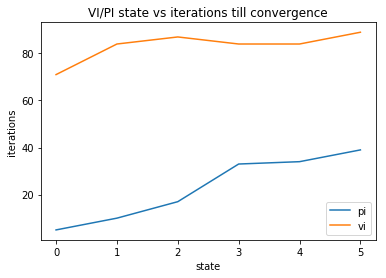

In [5]:
#ql_iters = ql_fm['iters'].values
vi_iters = vi_fm['iters'].values
pi_iters = pi_fm['iters'].values

df = pd.DataFrame(data=list(zip(
        pi_iters,vi_iters)),
            columns = ['pi','vi'])
df.name = 'states'

df.plot(kind='line',use_index=True)
plt.xlabel('state')
plt.ylabel('iterations')
plt.title('VI/PI state vs iterations till convergence')


plt.savefig(GRAPHLOC/'fig1.png')

[7.32421875e-03 7.26773739e-02 5.05004883e-01 3.93921590e+00
 1.45342948e+01 7.96187949e+01]


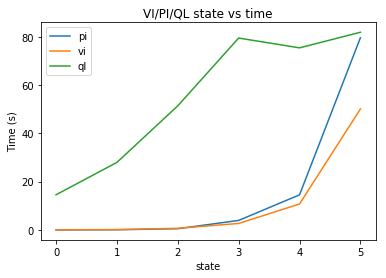

In [6]:
pi_ = pi_fm['time'].values
vi_ = vi_fm['time'].values
ql_ = ql_fm['time'].values

print(pi_)
df = pd.DataFrame(data=list(zip(
        pi_,vi_,ql_)),
            columns = ['pi','vi','ql'])

df.plot(kind='line')
plt.xlabel('state')
plt.ylabel('Time (s)')
plt.title('VI/PI/QL state vs time')
plt.savefig(GRAPHLOC/'fig2.png')

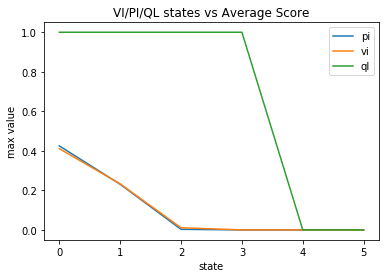

In [7]:
pi_ = pi_fm['avg_score'].values
vi_ = vi_fm['avg_score'].values
ql_ = ql_fm['average_score'].values

df = pd.DataFrame(data=list(zip(
        pi_,vi_,ql_)),
            columns = ['pi','vi','ql'])

df.plot(kind='line')
plt.xlabel('state')
plt.ylabel('max value')
plt.title('VI/PI/QL states vs Average Score')
plt.savefig(GRAPHLOC/'fig3.png')

### Talk about how thte policies are the same


### Policy Iteration Exploration

In [11]:
pig4 = pd.read_csv('data/frozenlake_policy_iteration_gamma_map4.csv')
pig8 = pd.read_csv('data/frozenlake_policy_iteration_gamma_map8.csv')
pig12 = pd.read_csv('data/frozenlake_policy_iteration_gamma_map16.csv')
pig16 = pd.read_csv('data/frozenlake_policy_iteration_gamma_map32.csv')


In [12]:
pig4.head()

,Unnamed: 0,gammas,time,iters,avg_score,policy,converge,v_map
0,0,0.05,0.002141,7,3.125000e-07,[2. 2. 1. 0. 0. 0. 1. 0. 2. 1. 1. 1. 0. 2. 2. 0.],True,[3.125e-07 6.250e-06 1.250e-04 6.250e-06 0.000...
1,1,0.10,0.002196,7,1.000000e-05,[2. 2. 1. 0. 0. 0. 1. 0. 2. 1. 1. 1. 0. 2. 2. 0.],True,[1.e-05 1.e-04 1.e-03 1.e-04 0.e+00 0.e+00 1.e...
2,2,0.15,0.002075,7,7.593750e-05,[2. 2. 1. 0. 0. 0. 1. 0. 2. 1. 1. 1. 0. 2. 2. 0.],True,[7.59375e-05 5.06250e-04 3.37500e-03 5.06250e-...
3,3,0.20,0.002138,7,3.200000e-04,[2. 2. 1. 0. 0. 0. 1. 0. 2. 1. 1. 1. 0. 2. 2. 0.],True,[3.2e-04 1.6e-03 8.0e-03 1.6e-03 0.0e+00 0.0e+...
4,4,0.25,0.002112,7,9.765625e-04,[2. 2. 1. 0. 0. 0. 1. 0. 2. 1. 1. 1. 0. 2. 2. 0.],True,[9.765625e-04 3.906250e-03 1.562500e-02 3.9062...


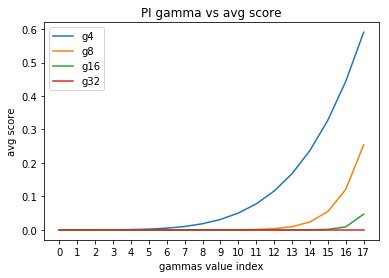

In [17]:
g4 = pig4['avg_score'].values
g8 = pig8['avg_score'].values
g12 = pig12['avg_score'].values
g16 = pig16['avg_score'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g16','g32'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('avg score')
plt.xticks(df.index)

plt.title('PI gamma vs avg score')

plt.savefig(GRAPHLOC/'fig4.png')

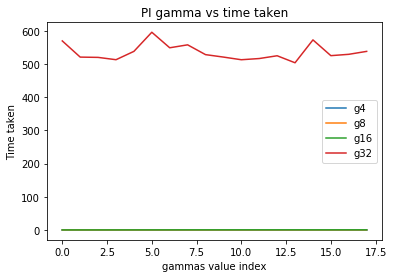

In [20]:
g4 = pig4['time'].values
g8 = pig8['time'].values
g12 = pig12['time'].values
g16 = pig16['time'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g16','g32'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('Time taken')

plt.title('PI gamma vs time taken')

plt.savefig(GRAPHLOC/'fig5.png')

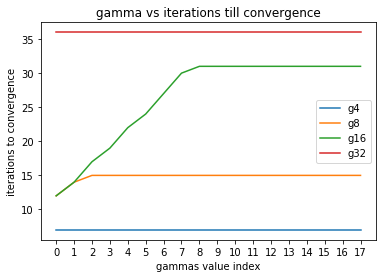

In [21]:
g4 = pig4['iters'].values
g8 = pig8['iters'].values
g12 = pig12['iters'].values
g16 = pig16['iters'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g16','g32'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('iterations to convergence')
plt.xticks(df.index)
plt.title('gamma vs iterations till convergence')

plt.savefig(GRAPHLOC/'fig6.png')

###  Value Iteration

In [22]:
vig4 = pd.read_csv('data/frozenlake_value_iteration_gamma_map4.csv')
vig8 = pd.read_csv('data/frozenlake_value_iteration_gamma_map8.csv')
vig12 = pd.read_csv('data/frozenlake_value_iteration_gamma_map16.csv')
vig16 = pd.read_csv('data/frozenlake_value_iteration_gamma_map32.csv')

In [23]:
vig4.head()

,Unnamed: 0,gammas,time,iters,policy,converge,v_map
0,0,0.05,0.011100,16,[3. 3. 2. 3. 0. 0. 0. 0. 1. 1. 1. 1. 0. 2. 2. 0.],True,[9.34496522e-10 5.42007983e-08 3.19691260e-06 ...
1,1,0.10,0.013587,20,[3. 3. 2. 3. 0. 0. 0. 0. 1. 1. 1. 1. 0. 2. 2. 0.],True,[3.27899800e-08 9.18119441e-07 2.65926738e-05 ...
2,2,0.15,0.014538,24,[3. 3. 2. 3. 0. 0. 0. 0. 1. 1. 1. 1. 0. 2. 2. 0.],True,[2.74792080e-07 4.94625743e-06 9.37040991e-05 ...
3,3,0.20,0.018607,28,[3. 3. 2. 3. 0. 0. 0. 0. 1. 1. 1. 1. 0. 2. 2. 0.],True,[1.28688836e-06 1.67295486e-05 2.32926793e-04 ...
4,4,0.25,0.017928,33,[3. 3. 2. 3. 0. 0. 0. 0. 1. 1. 1. 1. 0. 2. 2. 0.],True,[4.39803943e-06 4.39803943e-05 4.79386297e-04 ...


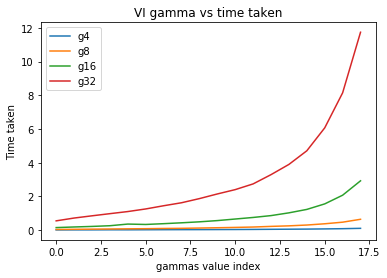

In [24]:
g4 = vig4['time'].values
g8 = vig8['time'].values
g12 = vig12['time'].values
g16 = vig16['time'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g16','g32'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('Time taken')

plt.title('VI gamma vs time taken')

plt.savefig(GRAPHLOC/'fig8.png')

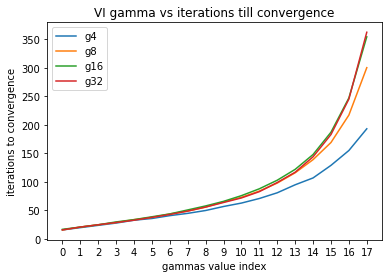

In [25]:
g4 = vig4['iters'].values
g8 = vig8['iters'].values
g12 = vig12['iters'].values
g16 = vig16['iters'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g16','g32'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('iterations to convergence')
plt.xticks(df.index)
plt.title('VI gamma vs iterations till convergence')

plt.savefig(GRAPHLOC/'fig9.png')

## Q learning

In [62]:
qlg4 = pd.read_csv('data/frozenlake_gammas8.csv')
qlg8 = pd.read_csv('data/frozenlake_gammas8.csv')
qlg12 = pd.read_csv('data/frozenlake_gammas32.csv')
qlg16 = pd.read_csv('data/frozenlake_gammas64.csv')

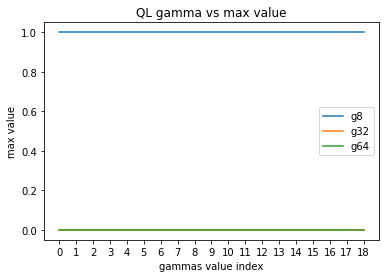

In [63]:
#g4 = qlg4['average_score'].values
g8 = qlg8['average_score'].values
g12 = qlg12['average_score'].values
g16 = qlg16['average_score'].values




df = pd.DataFrame(data=list(zip(
        g8,g12,g16)),
            columns = ['g8','g32','g64'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL gamma vs max value')

plt.savefig(GRAPHLOC/'fig10.png')

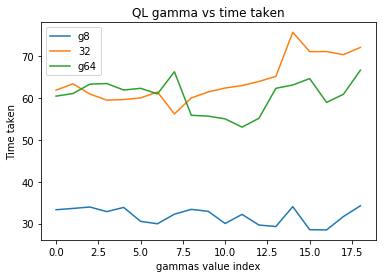

In [64]:
g4 = qlg4['time'].values
#g8 = qlg8['times_api'].values
g12 = qlg12['time'].values
g16 = qlg16['time'].values




df = pd.DataFrame(data=list(zip(
        g4,g12,g16)),
            columns = ['g8','32','g64'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('Time taken')

plt.title('QL gamma vs time taken')

plt.savefig(GRAPHLOC/'fig11.png')

In [93]:
#qled4 = pd.read_csv('data/fm_ql_eps_m4d.csv')
qled8 = pd.read_csv('data/frozenlake_eps8d.csv')
qled12 = pd.read_csv('data/frozenlake_eps32d.csv')
qled16 = pd.read_csv('data/frozenlake_eps64d.csv')

#qlend4 = pd.read_csv('data/fm_ql_eps_m4nd.csv')
qlend8 = pd.read_csv('data/frozenlake_eps8nd.csv')
qlend12 = pd.read_csv('data/frozenlake_eps32nd.csv')
qlend16 = pd.read_csv('data/frozenlake_eps64nd.csv')

In [94]:
qled8.head()

,Unnamed: 0,eps,time,average_score,policy,q_map
0,0,0.05,25.957447,1.0,"[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1]","{0: array([0.12079836, 0.17757342, 0.50134482,..."
1,1,0.10,23.264476,1.0,"[2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1]","{0: array([0.08721926, 0.12559849, 0.21684149,..."
2,2,0.15,23.126463,1.0,"[1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1]","{0: array([ 0.01093007, 0.17321067, 0.080262..."
3,3,0.20,22.934678,1.0,"[1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2]","{0: array([0.0628527 , 0.17795831, 0.12934345,..."
4,4,0.25,23.602337,1.0,"[1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1]","{0: array([0.21387298, 0.42684125, 0.27604474,..."


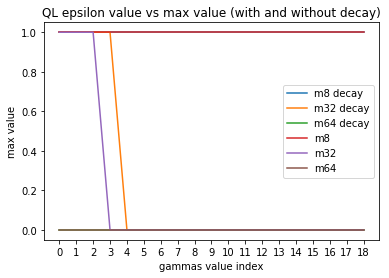

In [95]:
#g4 = qled4['max_value'].values
g8 = qled8['average_score'].values
g12 = qled12['average_score'].values
g16 = qled16['average_score'].values

#g24 = qlend4['max_value'].values
g28 = qlend8['average_score'].values
g212 = qlend12['average_score'].values
g216 = qlend16['average_score'].values




df = pd.DataFrame(data=list(zip(
        g8,g12,g16,g28,g212,g216)),
            columns = ['m8 decay','m32 decay','m64 decay','m8','m32','m64'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL epsilon value vs max value (with and without decay)')

plt.savefig(GRAPHLOC/'fig12.png')

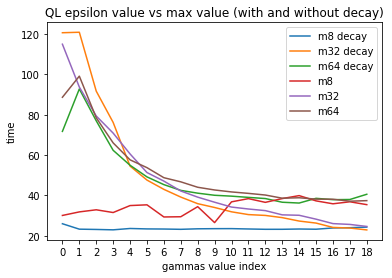

In [97]:
#g4 = qled4['max_value'].values
g8 = qled8['time'].values
g12 = qled12['time'].values
g16 = qled16['time'].values

#g24 = qlend4['max_value'].values
g28 = qlend8['time'].values
g212 = qlend12['time'].values
g216 = qlend16['time'].values




df = pd.DataFrame(data=list(zip(
        g8,g12,g16,g28,g212,g216)),
            columns = ['m8 decay','m32 decay','m64 decay','m8','m32','m64'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('time')
plt.xticks(df.index)

plt.title('QL epsilon value vs max value (with and without decay)')

plt.savefig(GRAPHLOC/'fig13.png')

In [98]:
#qled4 = pd.read_csv('data/fm_ql_eps_m4d.csv')
qled8 = pd.read_csv('data/frozenlake_lr8d.csv')
qled12 = pd.read_csv('data/frozenlake_lr32d.csv')
qled16 = pd.read_csv('data/frozenlake_lr64d.csv')

#qlend4 = pd.read_csv('data/fm_ql_eps_m4nd.csv')
qlend8 = pd.read_csv('data/frozenlake_lr8nd.csv')
qlend12 = pd.read_csv('data/frozenlake_lr32nd.csv')
qlend16 = pd.read_csv('data/frozenlake_lr64nd.csv')

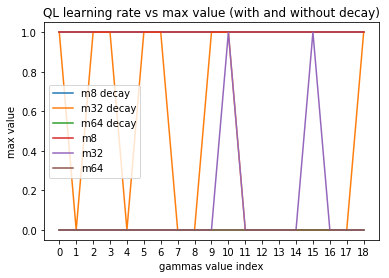

In [102]:
#g4 = qled4['max_value'].values
g8 = qled8['average_score'].values
g12 = qled12['average_score'].values
g16 = qled16['average_score'].values

#g24 = qlend4['max_value'].values
g28 = qlend8['average_score'].values
g212 = qlend12['average_score'].values
g216 = qlend16['average_score'].values




df = pd.DataFrame(data=list(zip(
        g8,g12,g16,g28,g212,g216)),
            columns = ['m8 decay','m32 decay','m64 decay','m8','m32','m64'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL learning rate vs max value (with and without decay)')

plt.savefig(GRAPHLOC/'fig14.png')

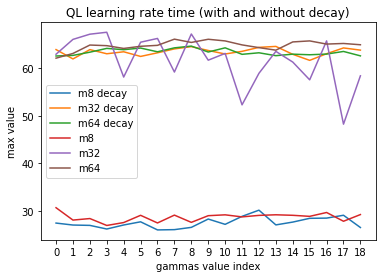

In [103]:
g8 = qled8['time'].values
g12 = qled12['time'].values
g16 = qled16['time'].values

#g24 = qlend4['max_value'].values
g28 = qlend8['time'].values
g212 = qlend12['time'].values
g216 = qlend16['time'].values




df = pd.DataFrame(data=list(zip(
        g8,g12,g16,g28,g212,g216)),
            columns = ['m8 decay','m32 decay','m64 decay','m8','m32','m64'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL learning rate time (with and without decay)')

plt.savefig(GRAPHLOC/'fig15.png')